<a href="https://colab.research.google.com/github/mikehviz/R_Data_Analysis_HW-s/blob/main/My_6_SupervisedLearning_Practice_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("partykit")
library(partykit)
library(dplyr)
#library(tidytext)
library(ggplot2)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
RNGkind(sample.kind="Rounding")  #issue with latest R installation
set.seed(9999) #so random number sequence is the same every time we run code


Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [ ]:
ciacountries <- read.csv("https://docs.google.com/spreadsheets/d/1-VY5o4FDbU1JSUMnpBnkCWxB8ASii-kL9WyJqq8JJ-o/export?format=csv", header = TRUE, stringsAsFactors = TRUE)
ciacountries


X,country,pop,area,oil_prod,gdp,educ,roadways,net_users
<int>,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
1,Afghanistan,32564342,652230,0,1900,NA,0.06462444,>5%
2,Albania,3029278,28748,20510,11900,3.3,0.62613051,>35%
3,Algeria,39542166,2381741,1420000,14500,4.3,0.04771929,>15%
4,American Samoa,54343,199,0,13000,NA,1.21105528,NA
5,Andorra,85580,468,NA,37200,NA,0.68376068,>60%
6,Angola,19625353,1246700,1742000,7300,3.5,0.04125211,>15%
7,Anguilla,16418,91,NA,12200,2.8,1.92307692,>15%
8,Antigua and Barbuda,92436,443,0,23600,2.4,2.64108352,>60%
9,Argentina,43431886,2780400,532100,22600,6.3,0.08321608,>35%


Clean missing data in the response variable (net_users), otherwise it won't work



In [ ]:
cleanedCIA <-
ciacountries %>%
  filter(!is.na(net_users))




Run a conditional inference tree to predict net_users with the cleaned data (use all predictor variables) and plot the results.



Model formula:
net_users ~ X + country + pop + area + oil_prod + gdp + educ + 
    roadways

Fitted party:
[1] root
|   [2] gdp <= 21500
|   |   [3] gdp <= 5600
|   |   |   [4] X <= 211: >0% (n = 54, err = 59.3%)
|   |   |   [5] X > 211: >15% (n = 10, err = 60.0%)
|   |   [6] gdp > 5600: >35% (n = 73, err = 46.6%)
|   [7] gdp > 21500: >60% (n = 79, err = 25.3%)

Number of inner nodes:    3
Number of terminal nodes: 4

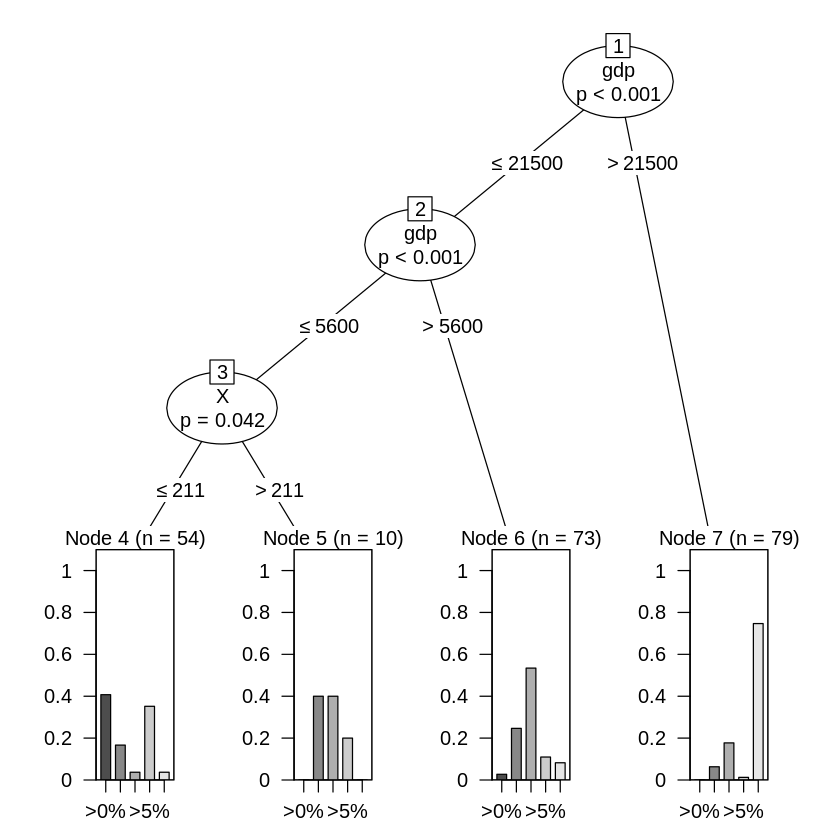

In [ ]:

net_users_tree <- ctree(net_users ~ ., data = cleanedCIA)
net_users_tree
plot(net_users_tree)

Divide the dataset into training and test data sets (70% in training data set)



In [ ]:

cleanedCIA <-
  ciacountries %>%
    
    filter(!is.na(net_users))


In [ ]:
cleanedCIA <- cleanedCIA %>%
  select(-X) 


In [ ]:
training_index <- sample(nrow(cleanedCIA), nrow(cleanedCIA)*.7)
sample_training_data <- cleanedCIA[training_index,]
sample_training_data


,country,pop,area,oil_prod,gdp,educ,roadways,net_users
,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
173,Sierra Leone,5879098,71740,0,1600,2.9,0.15751324,>0%
45,Comoros,780971,2235,0,1500,7.6,0.39373602,>5%
148,Oman,3286936,309500,943500,44600,4.3,0.19463651,>60%
180,Spain,48146134,505370,6419,34800,5.0,1.35183133,>60%
47,"Congo, Republic of the",4755097,342000,250000,6700,6.2,0.05055263,>0%
216,Zimbabwe,14229541,390757,0,2100,2.5,0.24891941,>15%
210,Vietnam,94348835,331210,298400,6000,6.3,0.62387307,>35%
155,Poland,38562189,312685,19260,26500,5.2,1.31773190,>60%
171,Serbia,7176794,77474,16840,13700,4.8,0.57113354,>35%


Create the test set by selecting every observation that is NOT in the training set  (-training_index).  NOTE the comma indicates we want every column for the selected rows.



In [ ]:

sample_test_data <- cleanedCIA[-training_index, ]
sample_test_data



,country,pop,area,oil_prod,gdp,educ,roadways,net_users
,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
4,Andorra,85580,468,NA,37200,NA,0.68376068,>60%
5,Angola,19625353,1246700,1742000,7300,3.5,0.04125211,>15%
7,Antigua and Barbuda,92436,443,0,23600,2.4,2.64108352,>60%
9,Armenia,3056382,29743,0,8500,3.3,0.25905255,>35%
10,Aruba,112162,180,0,25300,6.0,NA,>60%
18,Belarus,9589689,207600,30000,17700,5.1,0.41614643,>35%
19,Belgium,11323973,30528,0,43600,6.6,5.04494235,>60%
20,Belize,347369,22966,1818,8400,6.6,0.12496734,>15%
28,British Virgin Islands,33454,151,0,42300,4.4,1.32450331,>5%


Now train and test the model using the random training and test sets, using all of the variables. First create a new training tree.




Model formula:
net_users ~ country + pop + area + oil_prod + gdp + educ + roadways

Fitted party:
[1] root
|   [2] gdp <= 20800
|   |   [3] gdp <= 5600: >0% (n = 45, err = 64.4%)
|   |   [4] gdp > 5600: >35% (n = 48, err = 50.0%)
|   [5] gdp > 20800: >60% (n = 58, err = 22.4%)

Number of inner nodes:    2
Number of terminal nodes: 3


Model formula:
net_users ~ country + pop + area + oil_prod + gdp + educ + roadways

Fitted party:
[1] root
|   [2] gdp <= 20800
|   |   [3] gdp <= 5600: >0% (n = 46, err = 65.2%)
|   |   [4] gdp > 5600: >35% (n = 47, err = 48.9%)
|   [5] gdp > 20800: >60% (n = 58, err = 22.4%)

Number of inner nodes:    2
Number of terminal nodes: 3

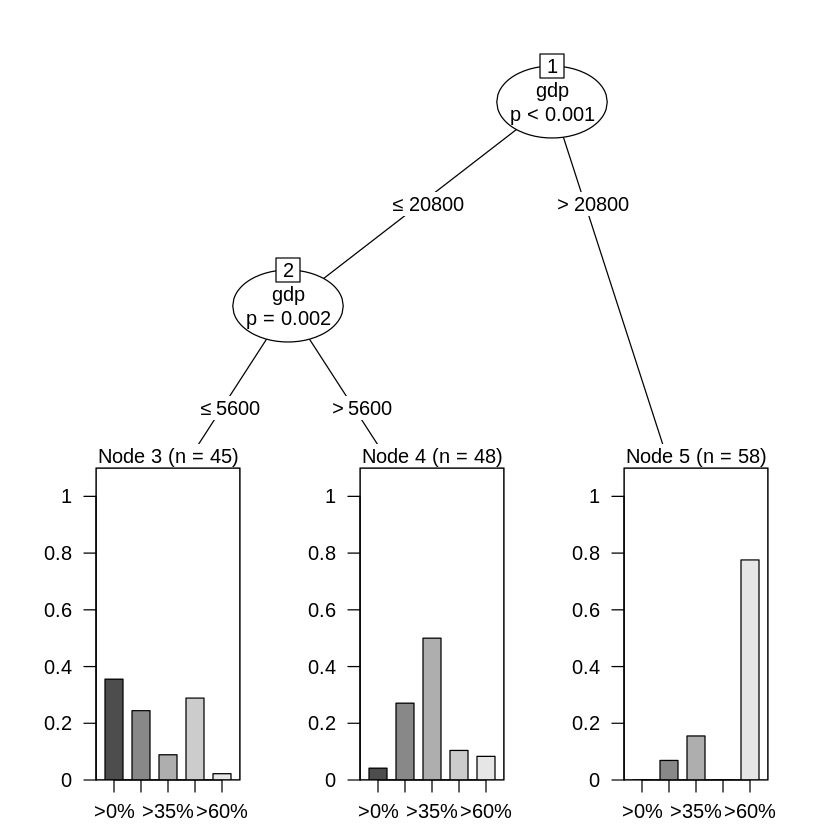

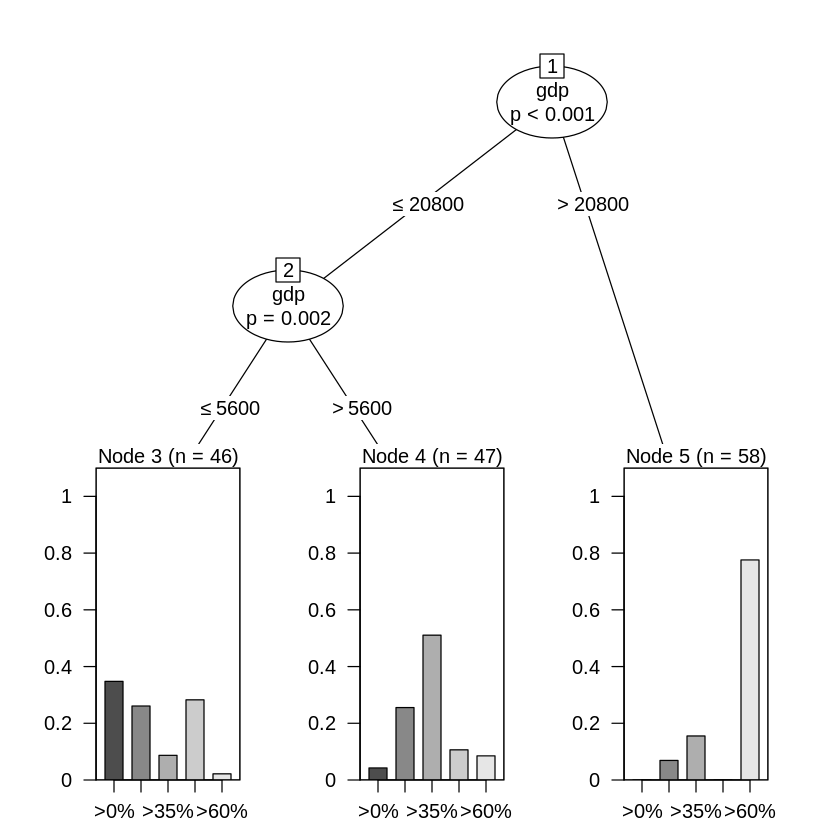

In [ ]:

training_tree <- ctree(net_users ~., data = sample_training_data)
training_tree
plot(training_tree)

training_tree <- ctree(net_users ~ ., data = sample_training_data)
training_tree
plot(training_tree)


TASK : Now use the test_data on the training tree to see how well it predicts the outcome.



In [ ]:
#predict using the test data

predict_data <- predict(training_tree, newdata = sample_test_data)
predict_data

4    5    7    9   10   18   19   20   28   31   33   34   37   40   44   46 
>60% >35% >60% >35% >60% >35% >60% >35% >60%  >0%  >0% >35% >60%  >0% >35%  >0% 
  48   49   52   55   57   58   59   60   61   63   73   78   82   86   88   89 
>35% >35% >35% >60% >35% >35% >35% >35% >35%  >0%  >0% >60% >35% >35%  >0% >60% 
  91   96  104  105  106  111  115  118  119  120  121  122  128  129  131  132 
>60% >60%  >0%  >0% >60% >35% >60% >60% >35%  >0%  >0% >60% >35% >35%  >0% >60% 
 137  139  141  150  152  153  160  162  165  166  170  177  188  197  206  208 
 >0%  >0% >60% >60% >35% >35% >60% >35% >35%  >0%  >0%  >0% >60% >35% >60%  >0% 
 212 
 >0% 
Levels: >0% >15% >35% >5% >60%

TASK: Create the confusion matrix to compare predicted values with actual values.



In [ ]:

prediction_table <- table("Predicted" = predict_data, "Actual" = sample_test_data$net_users)
prediction_table


         Actual
Predicted >0% >15% >35% >5% >60%
     >0%    6    2    2   8    1
     >15%   0    0    0   0    0
     >35%   0    6   14   3    2
     >5%    0    0    0   0    0
     >60%   0    0    6   1   14


TASK: Create the  proportion table


In [ ]:
 
pred_prop <- prop.table(prediction_table)
pred_prop


         Actual
Predicted        >0%       >15%       >35%        >5%       >60%
     >0%  0.09230769 0.03076923 0.03076923 0.12307692 0.01538462
     >15% 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
     >35% 0.00000000 0.09230769 0.21538462 0.04615385 0.03076923
     >5%  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
     >60% 0.00000000 0.00000000 0.09230769 0.01538462 0.21538462

With the tennis example, we had 2 response categories "yes" and "no."  So we could calculate accuracy by adding predict yes/actual yes plus predict no/actual no.  With this, we add the proportions along the diagonal (predicted value=actual value in other words the rows and columns have the same label or position).


**Try the next challenge and then stop.  We'll walk through the rest together.**

CHALLENGE: What is the accuracy of model (% of net_users predicted is same as actual)


In [ ]:

pred_prop[">0%", ">0%"] + pred_prop [">15%", ">15%"] + pred_prop[">35%", ">35%"] + pred_prop[">5%", ">5%"] + pred_prop[">60%", ">60%"]


[1] 0.5384615

Do the same thing using row and column indexing



In [ ]:
 
pred_prop[1,1] + pred_prop[2,2] + pred_prop[3,3] + pred_prop[4,4] + pred_prop[5,5]


[1] 0.5230769

We want each entry where the row equals the column.  This is the diagonal.  Then we sum the values of diagonal to compute the accuracy of the predictions.



In [ ]:

pred_prop[col(pred_prop)==row(pred_prop)] %>%
  sum()


[1] 0.5230769

In the example with tennis, we could calculate false positives and false negatives.  Here, we have more than two categories. But we could calculate over-estimation (predicted is greater than actual) and under-estimation (predicted is less than the actual).   If the columns were ordered by increasing % of net-users, then over-estimation would be everything below the diagonal in the predicted probabilities table.  Conversely, under-estimation would be everything above the diagonal.  

Alas, they are not ordered numerically because they're factors that use a default alphabetic order (the 3 in >35% comes before the 5 in >5%). 


So let's order net_users.  More wrangling!  We're keeping the values as factors but imposing an order.


In [ ]:

cleanedCIA <- cleanedCIA %>%
  mutate(net_users = factor(net_users, levels = c(">0%",">5%",">15%",">35%",">60%")))


Redo everything with properly ordered response variable starting with the same seed to produce the same random numbers.


Reset the seed to get the same set of random numbers


In [ ]:

RNGkind(sample.kind="Rounding")
set.seed(9999)


Warning message in RNGkind(sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Divide the dataset into training and test data sets



In [ ]:
###################################################################
training_index <- sample(nrow(cleanedCIA), nrow(cleanedCIA)*.7)
sample_training_data <- cleanedCIA[training_index,]
sample_training_data


,country,pop,area,oil_prod,gdp,educ,roadways,net_users
,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
186,Switzerland,8121830,41277,0,58600,5.2,1.73132737,>60%
142,New Zealand,4438393,267710,39860,36200,7.4,0.35172388,>60%
172,Seychelles,92430,455,0,26300,3.6,1.11648352,>35%
45,Comoros,780971,2235,0,1500,7.6,0.39373602,>5%
147,Norway,5207689,323802,1568000,68400,6.9,0.28989938,>60%
179,South Africa,53675563,1219090,3000,13200,6.0,0.61276362,>35%
47,"Congo, Republic of the",4755097,342000,250000,6700,6.2,0.05055263,>0%
214,Yemen,26737317,527968,125100,2700,5.2,0.13504606,>15%
208,Vanuatu,272264,12189,0,2500,5.0,0.08778407,>5%



Create the test set by selecting every observation that is NOT in the training set  (-training_index).  NOTE the comma indicates we want every column for the selected rows.


In [ ]:

sample_test_data <- cleanedCIA[-training_index,]
sample_test_data


,country,pop,area,oil_prod,gdp,educ,roadways,net_users
,<fct>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<fct>
4,Andorra,85580,468,NA,37200,NA,0.68376068,>60%
5,Angola,19625353,1246700,1742000,7300,3.5,0.04125211,>15%
7,Antigua and Barbuda,92436,443,0,23600,2.4,2.64108352,>60%
9,Armenia,3056382,29743,0,8500,3.3,0.25905255,>35%
10,Aruba,112162,180,0,25300,6.0,NA,>60%
15,Bahrain,1346613,760,49500,50100,2.6,5.42368421,>60%
18,Belarus,9589689,207600,30000,17700,5.1,0.41614643,>35%
19,Belgium,11323973,30528,0,43600,6.6,5.04494235,>60%
20,Belize,347369,22966,1818,8400,6.6,0.12496734,>15%



Now we will train and test the model using the random training and test sets, using all of the variables. First we create a new training tree.



Model formula:
net_users ~ country + pop + area + oil_prod + gdp + educ + roadways

Fitted party:
[1] root
|   [2] gdp <= 20800
|   |   [3] gdp <= 2100: >0% (n = 16, err = 37.5%)
|   |   [4] gdp > 2100
|   |   |   [5] roadways <= 1.42667: >35% (n = 67, err = 64.2%)
|   |   |   [6] roadways > 1.42667: >60% (n = 7, err = 57.1%)
|   [7] gdp > 20800: >60% (n = 61, err = 26.2%)

Number of inner nodes:    3
Number of terminal nodes: 4

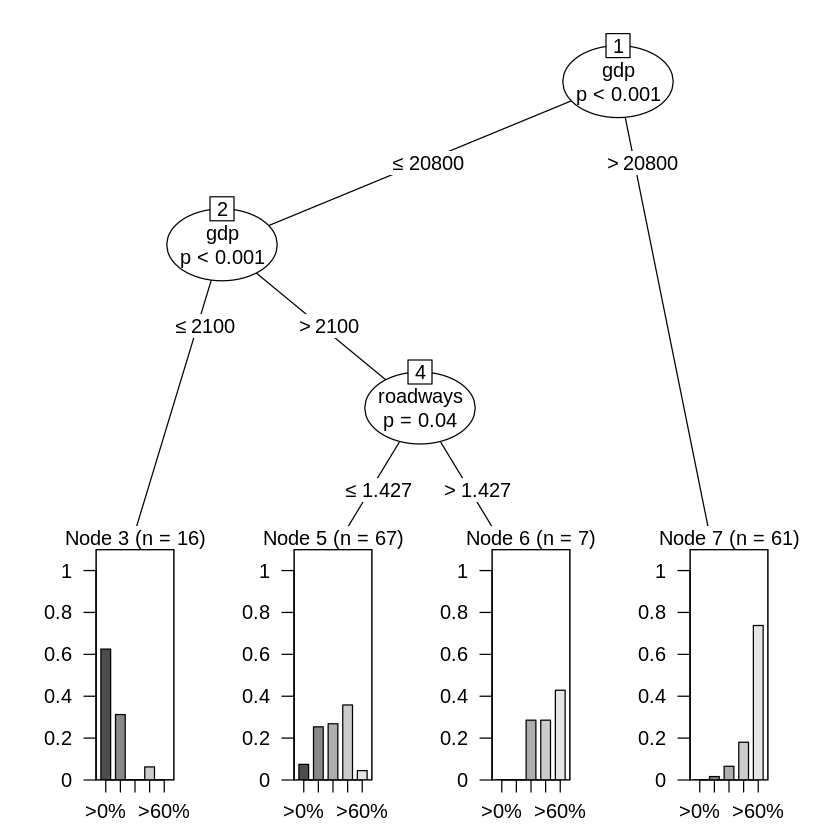

In [ ]:

training_tree <- ctree(net_users ~., data=sample_training_data)
training_tree
plot(training_tree)




TASK : Now use the test_data on the training tree to see how well it predicts the outcome.


In [ ]:
#predict using the test data
predict_data <- predict(training_tree, newdata=sample_test_data)
predict_data
prediction_table


4    5    7    9   10   15   18   19   20   23   32   33   34   36   43   46 
>60% >35% >60% >35% >60% >60% >35% >60% >35% >35% >35%  >0% >35% >35% >35%  >0% 
  48   54   56   57   58   59   60   63   68   70   71   73   77   81   84   87 
>35% >60% >35% >60% >35% >35% >35%  >0% >35% >60% >60%  >0% >60% >60%  >0%  >0% 
  88   91  103  109  117  119  120  121  126  127  129  130  131  132  135  145 
>35% >60% >60% >35% >60% >35%  >0%  >0% >60% >35% >35% >35% >35% >60% >35% >35% 
 146  148  151  152  160  168  175  177  187  197  201  206  207  209  210  213 
>35% >60% >35% >35% >60% >35% >60%  >0% >35% >35%  >0% >60% >35% >35% >35% >35% 
 216 
 >0% 
Levels: >0% >5% >15% >35% >60%

         Actual
Predicted >0% >5% >15% >35% >60%
     >0%    5   3    3    0    1
     >5%    0   0    0    0    0
     >15%   0   0    0    0    0
     >35%   3   4    9   16    1
     >60%   1   0    0    5   14


TASK: Recalculate the confusion matrix and check the accuracy of the model using the random training set of size 70%


In [ ]:

prediction_table <- table("Predicted"= predict_data, "Actual" = sample_test_data$net_users)
prediction_table



         Actual
Predicted >0% >5% >15% >35% >60%
     >0%    5   3    3    0    1
     >5%    0   0    0    0    0
     >15%   0   0    0    0    0
     >35%   3   4    9   16    1
     >60%   1   0    0    5   14


TASK: Create the  proportion table


In [ ]:

pred_prop <- prop.table(prediction_table)
pred_prop


         Actual
Predicted        >0%        >5%       >15%       >35%       >60%
     >0%  0.07692308 0.04615385 0.04615385 0.00000000 0.01538462
     >5%  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
     >15% 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
     >35% 0.04615385 0.06153846 0.13846154 0.24615385 0.01538462
     >60% 0.01538462 0.00000000 0.00000000 0.07692308 0.21538462

Voila!  The table is ordered.  Now we can calculate over- and under-predictions.

TASK: Do again--What is the accuracy of model (% of net_users predicted is same as actual)


In [ ]:

pred_prop[col(pred_prop)==row(pred_prop)] %>%
  sum()



[1] 0.5384615


Calculate underpredictions: predicted is less than actual when the column is greater than than the row


In [ ]:

pred_prop[col(pred_prop)>row(pred_prop)] %>%
  sum()

[1] 0.1230769


Calculate overpredictions:  when column is less than the row


In [ ]:

pred_prop[col(pred_prop)<row(pred_prop)] %>%
  sum()


[1] 0.3384615